In [ ]:
import torch
import torch.nn as nn

class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()
        self.initial_position_leading_car = 20    # Leading car의 초기 위치
        self.initial_position_tracking_car = 0   # Tracking car의 초기 위치
        self.initial_velocity_tracking_car = 0   # Tracking car의 초기 속도
        self.target_distance = 10
        self.dt = 0.1
        self.total_time = 30
        self.time = np.arange(0, self.total_time, self.dt)

    def velocity_leading_car(self, t):
        v_t = 2*t
        return v_t  # 일단 상수 함수로 설정
    
    def PID_control(self, distance_error, integral_error, prev_distance_error, predictions):
        return predictions[0] * distance_error + predictions[2] * integral_error + predictions[1] * (distance_error - prev_distance_error) / dt
    
    def forward(self):
        # Compute your custom loss
        #loss = torch.mean((predictions - targets)**2)  # Example: Mean Squared Error
        loss = 0
        positions_leading_car = np.zeros_like(self.time)     #Leading car의 위치 리스트 
        positions_tracking_car = np.zeros_like(self.time)    #Tracking car의 위치 리스트 
        velocities_tracking_car = np.zeros_like(self.time)   #Tracking car의 속도 리스트 
        distance_between_cars = np.zeros_like(self.time)

        # 초기 상태 설정
        position_leading_car = self.initial_position_leading_car
        position_tracking_car = self.initial_position_tracking_car
        velocity_tracking_car = self.initial_velocity_tracking_car
        integral_error = 0
        prev_distance_error = 0

        # 시뮬레이션 루프
        for i, t in enumerate(self.time):
            # Leading car의 위치 업데이트, 저장
            position_leading_car += velocity_leading_car(t) * self.dt
            positions_leading_car[i] = position_leading_car
            
            # Tracking car의 위치, 속도 저장
            positions_tracking_car[i] = position_tracking_car
            velocities_tracking_car[i] = velocity_tracking_car

            #현재 차간거리 계산, 저장
            distance_between_cars[i] = position_leading_car - position_tracking_car
            
            # 오차 계산
            distance_error = position_leading_car - position_tracking_car - self.target_distance
            integral_error += distance_error * self.dt
            
            # PID 제어기를 사용하여 Tracking car의 속도 업데이트
            velocity_tracking_car += PID_control(distance_error, integral_error, prev_distance_error) * self.dt
            prev_distance_error = distance_error
            
            # Tracking car의 위치 업데이트
            position_tracking_car += velocity_tracking_car * self.dt
            loss = loss + abs(position_leading_car-position_tracking_car)
        return loss


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [ ]:
# Define model parameters
input_size = 3
hidden_size = 3
output_size = 3

# Instantiate model and loss
model = MLP(input_size, hidden_size, output_size)
loss_function = CustomLoss()

In [1]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

NameError: name 'torch' is not defined

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, num_samples):
        self.num_samples = num_samples
        self.data = self.generate_data()

    def generate_data(self):
        # Generate random samples of two float numbers in the range [0, 10]
        return [(np.random.rand(2) * 10).astype(np.float32) for _ in range(self.num_samples)]

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        sample = self.data[idx]
        return torch.tensor(sample)

# Create a CustomDataset instance with 100 samples
dataset = CustomDataset(num_samples=100)

# Create a DataLoader with batch size 10
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Iterate through the DataLoader
for batch in dataloader:
    print("Batch shape:", batch.shape)
    print("Batch content:", batch)

In [ ]:
import torch
from torch.utils.data import DataLoader
import numpy as np

# Define your CustomDataset class (as shown in the previous response)

# Assuming you have defined your model, optimizer, and loss function

# Create an instance of CustomDataset with 1000 samples
dataset = CustomDataset(num_samples=1000)

# Create a DataLoader with batch size 32 and shuffle the data
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for inputs in train_loader:  # Iterate over your training data
        optimizer.zero_grad()
        predictions = model(inputs)
        
        # Generate random targets for demonstration purposes
        targets = torch.tensor(np.random.rand(len(inputs), 2), dtype=torch.float32)
        
        loss = loss_function(predictions, targets)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

/opt/conda/lib/python3.8/site-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '2.7.1' or newer of 'numexpr' (version '2.7.0' currently installed).
  warnings.warn(msg, UserWarning)


Epoch 1/60, Train Loss: 4.6410, Test Loss: 4.8806
Epoch 2/60, Train Loss: 4.3003, Test Loss: 4.5509
Epoch 3/60, Train Loss: 3.9934, Test Loss: 4.2465
Epoch 4/60, Train Loss: 3.7076, Test Loss: 3.9700
Epoch 5/60, Train Loss: 3.4482, Test Loss: 3.7188
Epoch 6/60, Train Loss: 3.2190, Test Loss: 3.4914
Epoch 7/60, Train Loss: 3.0134, Test Loss: 3.2909
Epoch 8/60, Train Loss: 2.8286, Test Loss: 3.1171
Epoch 9/60, Train Loss: 2.6731, Test Loss: 2.9682
Epoch 10/60, Train Loss: 2.5401, Test Loss: 2.8393
Epoch 11/60, Train Loss: 2.4259, Test Loss: 2.7247
Epoch 12/60, Train Loss: 2.3242, Test Loss: 2.6199
Epoch 13/60, Train Loss: 2.2317, Test Loss: 2.5223
Epoch 14/60, Train Loss: 2.1460, Test Loss: 2.4312
Epoch 15/60, Train Loss: 2.0684, Test Loss: 2.3434
Epoch 16/60, Train Loss: 1.9954, Test Loss: 2.2587
Epoch 17/60, Train Loss: 1.9224, Test Loss: 2.1772
Epoch 18/60, Train Loss: 1.8543, Test Loss: 2.0979
Epoch 19/60, Train Loss: 1.7873, Test Loss: 2.0206
Epoch 20/60, Train Loss: 1.7234, Test Lo

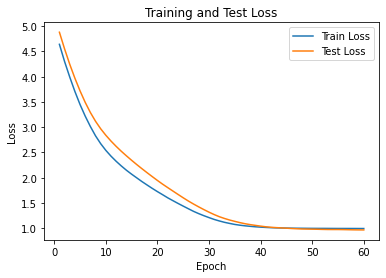

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Load data from CSV
df = pd.read_csv('tuning.csv')

# Split data into features and labels
X = df.iloc[:, :3]
y = df.iloc[:, 3:]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define model, loss function, and optimizer
input_size = 3
hidden_size = 6
output_size = 3

model = MLP(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 60
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    model.eval()
    running_loss = 0.0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
    test_loss = running_loss / len(test_loader.dataset)
    test_losses.append(test_loss)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plot loss graph
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()


Epoch 1/200, Train Loss: 2.0704, Test Loss: 2.2909
Saved the best model with test loss: 2.290947675704956
Epoch 2/200, Train Loss: 1.9904, Test Loss: 2.2028
Saved the best model with test loss: 2.2027809619903564
Epoch 3/200, Train Loss: 1.9184, Test Loss: 2.1210
Saved the best model with test loss: 2.1210343837738037
Epoch 4/200, Train Loss: 1.8540, Test Loss: 2.0468
Saved the best model with test loss: 2.0467708110809326
Epoch 5/200, Train Loss: 1.7954, Test Loss: 1.9827
Saved the best model with test loss: 1.982682466506958
Epoch 6/200, Train Loss: 1.7404, Test Loss: 1.9228
Saved the best model with test loss: 1.9227560758590698
Epoch 7/200, Train Loss: 1.6939, Test Loss: 1.8660
Saved the best model with test loss: 1.8660002946853638
Epoch 8/200, Train Loss: 1.6475, Test Loss: 1.8139
Saved the best model with test loss: 1.8139067888259888
Epoch 9/200, Train Loss: 1.6022, Test Loss: 1.7624
Saved the best model with test loss: 1.7623636722564697
Epoch 10/200, Train Loss: 1.5594, Test 

/opt/conda/lib/python3.8/site-packages/torch/nn/modules/module.py:1402: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


Epoch 36/200, Train Loss: 0.9704, Test Loss: 0.9299
Epoch 37/200, Train Loss: 0.9694, Test Loss: 0.9334
Epoch 38/200, Train Loss: 0.9689, Test Loss: 0.9418
Epoch 39/200, Train Loss: 0.9685, Test Loss: 0.9500
Epoch 40/200, Train Loss: 0.9682, Test Loss: 0.9553
Epoch 41/200, Train Loss: 0.9692, Test Loss: 0.9594
Epoch 42/200, Train Loss: 0.9695, Test Loss: 0.9608
Epoch 43/200, Train Loss: 0.9697, Test Loss: 0.9616
Epoch 44/200, Train Loss: 0.9694, Test Loss: 0.9586
Epoch 45/200, Train Loss: 0.9687, Test Loss: 0.9563
Epoch 46/200, Train Loss: 0.9681, Test Loss: 0.9532
Epoch 47/200, Train Loss: 0.9677, Test Loss: 0.9505
Epoch 48/200, Train Loss: 0.9673, Test Loss: 0.9473
Epoch 49/200, Train Loss: 0.9672, Test Loss: 0.9432
Epoch 50/200, Train Loss: 0.9674, Test Loss: 0.9386
Epoch 51/200, Train Loss: 0.9674, Test Loss: 0.9380
Epoch 52/200, Train Loss: 0.9672, Test Loss: 0.9410
Epoch 53/200, Train Loss: 0.9675, Test Loss: 0.9480
Epoch 54/200, Train Loss: 0.9676, Test Loss: 0.9521
Epoch 55/200

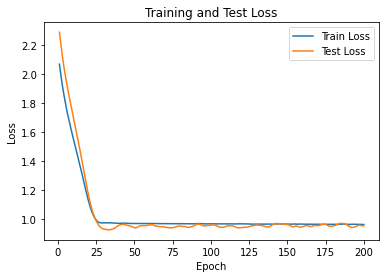

Predicted output using the best model: [[1.4735726  0.49054372 2.2026699 ]]


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Load data from CSV
df = pd.read_csv('tuning.csv')

# Split data into features and labels
X = df.iloc[:, :3]
y = df.iloc[:, 3:]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define model, loss function, and optimizer
input_size = 3
hidden_size = 6
output_size = 3

model = MLP(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 200
train_losses = []
test_losses = []
best_test_loss = float('inf')
best_model_path = 'best_model.pth'

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    model.eval()
    running_loss = 0.0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
    test_loss = running_loss / len(test_loader.dataset)
    test_losses.append(test_loss)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    
    # Save the model if the current test loss is lower than the previous best test loss
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        torch.save(model.state_dict(), best_model_path)
        print("Saved the best model with test loss:", best_test_loss)

# Plot loss graph
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Load the best model
loaded_model = MLP(input_size, hidden_size, output_size)
loaded_model.load_state_dict(torch.load(best_model_path))
loaded_model.eval()

# Example usage to make predictions
inputs = torch.tensor([[24.0, 7.0, 2.0]])  # Example input
outputs = loaded_model(inputs)
print("Predicted output using the best model:", outputs.detach().numpy())


In [5]:
inputs = torch.tensor([[20.0, 3.0, 2.0]])  # Example input
outputs = loaded_model(inputs)
print("Predicted output using the best model:", outputs.detach().numpy())

NameError: name 'torch' is not defined

In [8]:
outputs.detach().numpy()[0][0]

1.2263963